# IF240 - Apprentissage et deep learning

## Assignment 1: Kmeans, Naive Bayes, SVM 

By Aurélie Bugeau


### Objectives 
The objective is to apply classification algorithms for digit recognition

(1797, 64)


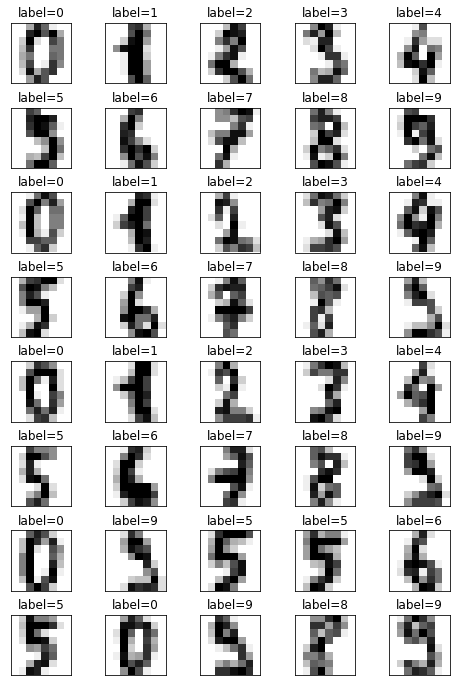

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(8, 5, figsize=(8, 12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
i=0
for axi in ax.flat:
    axi.set(xticks=[], yticks=[])
    axi.set_title("label=%d"%digits.target[i] )
    axi.imshow(digits.images[i], interpolation='nearest', cmap=plt.cm.binary)
    i+=1

### Question 1 - Kmeans
Apply kmeans to cluster this dataset. Visualize the resulting centroids as images after reshaping them. 
Check to which cluster is assigned each data as in a classification problem. Analyse the results.

Be careful: the index of the clusters you find do not mandatorily correspond to the digit value (initial label). One way to find which label corresponds to each cluster is to visualise the centroid images, or to compute the mode of each class in the groundtruth
`
import numpy as np
from scipy.stats import mode
labels = np.zeros_like(Y)
for i in range(10):
    indices = np.where(y_pred == i)[0]
    labels[indices] = mode(digits.target[indices])[0]
    `

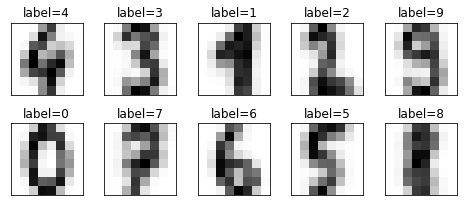

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.60      0.30      0.40       182
           2       0.84      0.84      0.84       177
           3       0.86      0.85      0.85       183
           4       0.98      0.90      0.94       181
           5       0.91      0.75      0.82       182
           6       0.97      0.98      0.98       181
           7       0.86      0.99      0.92       179
           8       0.45      0.59      0.51       174
           9       0.57      0.77      0.66       180

    accuracy                           0.80      1797
   macro avg       0.80      0.80      0.79      1797
weighted avg       0.81      0.80      0.79      1797



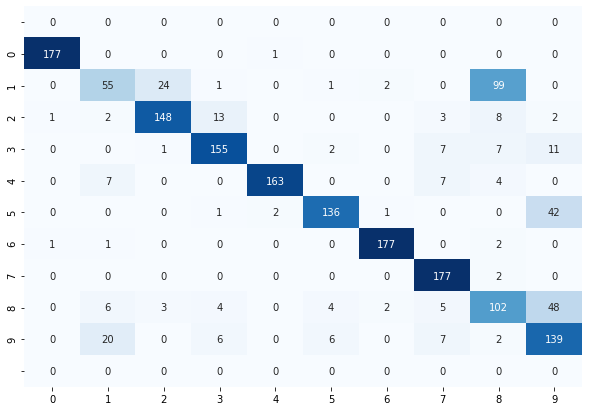

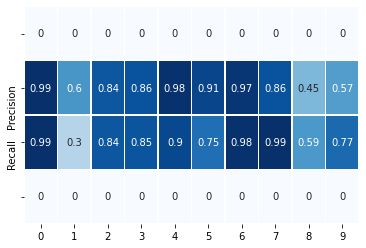

In [2]:
######################################## Détermine les centroïds

X=digits.data
Y=digits.target
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

######################################## Associe les chiffres aux centroïds

from scipy.stats import mode
labels = np.zeros_like(Y)
Y_label = np.zeros(10) # Label des centroïds
for i in range(10):
    y_pred = kmeans.predict(X) #Prédiction 
    indices = np.where(y_pred == i)[0] #Sort la liste des indices où on a prédit que c'était i
    Y_label[i] = mode(digits.target[indices])[0]  #On affecte au centroïd i sa vrai valeur
    labels[indices] = mode(digits.target[indices])[0]

for i in range(len(y_pred)):
    y_pred[i] = Y_label[y_pred[i]]

######################################## Affiche les centroïdes sous la forme de chiffre avec leurs labels
    
img=kmeans.cluster_centers_.reshape((10,8,8)) #Rédefini les centroïds pour ne faire des vecteurs
fig, ax = plt.subplots(2, 5, figsize=(8, 8)) 
plt.subplots_adjust(wspace=0.3, hspace=-0.7)
i=0
for axi in ax.flat:
    axi.set(xticks=[], yticks=[])
    axi.set_title("label=%d"%Y_label[i] )
    axi.imshow(img[i], cmap='Greys')
    i+=1
plt.show()

######################################## Créer et affiche la matrice de confusion

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
    
cm =confusion_matrix(Y, y_pred)
cm_ok = np.zeros((12,10))
for i in range(10):
    cm_ok[i+1]=cm[i]
df_cm = pd.DataFrame(cm_ok, index = [i for i in " 0123456789 "],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cbar=False, cmap="Blues", fmt='g')

######################################## Créer et affiche les stats de la classification

from sklearn.metrics import classification_report
print(classification_report(Y, y_pred))
df_cm2 = pd.DataFrame([[0,0,0,0,0,0,0,0,0,0],[0.99,0.60,0.84,0.86,0.98,0.91,0.97,0.86,0.45,0.57],[0.99,0.30,0.84,0.85,0.90,0.75,0.98,0.99,0.59,0.77],[0,0,0,0,0,0,0,0,0,0]], index = [" ","Precision","Recall"," "],
                  columns = [i for i in "0123456789"])
plt.figure()
sns.heatmap(df_cm2, annot=True, cbar=False, cmap="Blues", fmt='g', linewidths=.5)



### Question 2
Apply Naive Bayes classification to the digit classification problem. Analyse your results.


Gaussian: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.76      0.82      0.79        34
           2       0.93      0.69      0.79        36
           3       0.96      0.68      0.79        34
           4       0.96      0.92      0.94        48
           5       0.89      1.00      0.94        39
           6       0.97      0.97      0.97        30
           7       0.85      0.90      0.88        31
           8       0.60      0.85      0.71        41
           9       0.92      0.74      0.82        31

    accuracy                           0.86       356
   macro avg       0.88      0.86      0.86       356
weighted avg       0.88      0.86      0.86       356

Multinomial: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.73      0.79      0.76        34
           2       0.86      0.89      0.88        

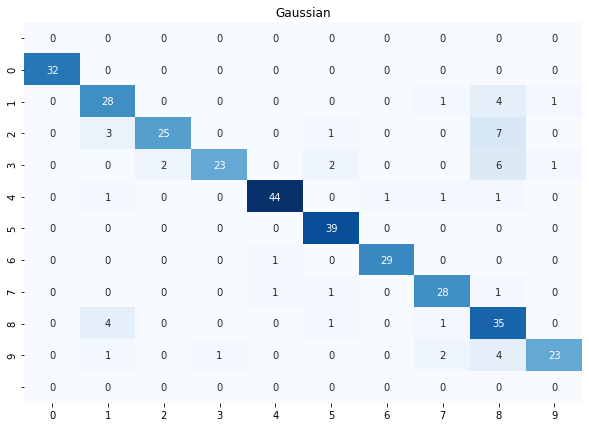

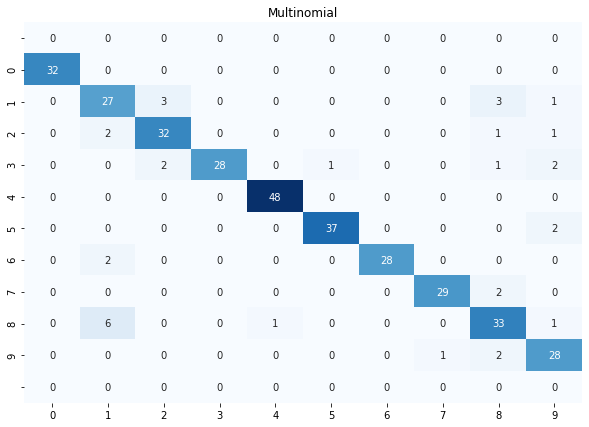

In [3]:
X=digits.data
Y=digits.target
msk = np.random.rand(len(X)) < 0.8

training_set_X = X[msk]
testing_set_X = X[~msk]

training_set_Y = Y[msk]
testing_set_Y = Y[~msk]

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
#Create a Gaussian Classifier
clfG = GaussianNB()
#Create a Multinomial Classifier
clfM = MultinomialNB()
# Train the model using the training sets
clfG.fit(training_set_X,training_set_Y)
clfM.fit(training_set_X,training_set_Y)

y_predG = clfG.predict(testing_set_X)
y_predM = clfM.predict(testing_set_X)

######################################## Créer et affiche la matrice de confusion

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
    
cmG =confusion_matrix(testing_set_Y, y_predG)
cm_okG = np.zeros((12,10))

cmM =confusion_matrix(testing_set_Y, y_predM)
cm_okM = np.zeros((12,10))

for i in range(10):
    cm_okG[i+1]=cmG[i]
    cm_okM[i+1]=cmM[i]
df_cmG = pd.DataFrame(cm_okG, index = [i for i in " 0123456789 "],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
axG = plt.axes()
sns.heatmap(df_cmG, annot=True, cbar=False, cmap="Blues", fmt='g', ax = axG)
axG.set_title('Gaussian')

df_cmM = pd.DataFrame(cm_okM, index = [i for i in " 0123456789 "],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
axM = plt.axes()
sns.heatmap(df_cmM, annot=True, cbar=False, cmap="Blues", fmt='g', ax = axM)
axM.set_title('Multinomial')

######################################## Créer et affiche les stats de la classification

from sklearn.metrics import classification_report
print("Gaussian: \n",classification_report(testing_set_Y, y_predG))
print("Multinomial: \n",classification_report(testing_set_Y, y_predM))

### Question 3
Apply SVM classification to the digit classification problem. Analyse your results.


In [6]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(training_set_X,training_set_Y)
y_pred = svc.predict(testing_set_X)

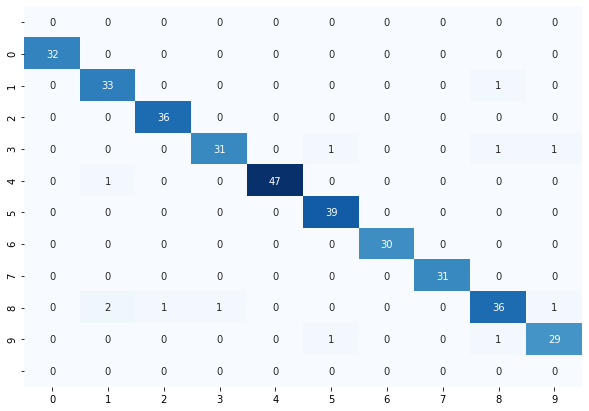

In [8]:
accuracy_score(testing_set_Y, y_pred)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
    
cm =confusion_matrix(testing_set_Y, y_pred)
cm_ok = np.zeros((12,10))
for i in range(10):
    cm_ok[i+1]=cm[i]
df_cm = pd.DataFrame(cm_ok, index = [i for i in " 0123456789 "],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cbar=False, cmap="Blues", fmt='g')


In [9]:
from sklearn import svm
svc = svm.SVC(kernel='poly')
svc.fit(training_set_X,training_set_Y)
y_pred = svc.predict(testing_set_X)

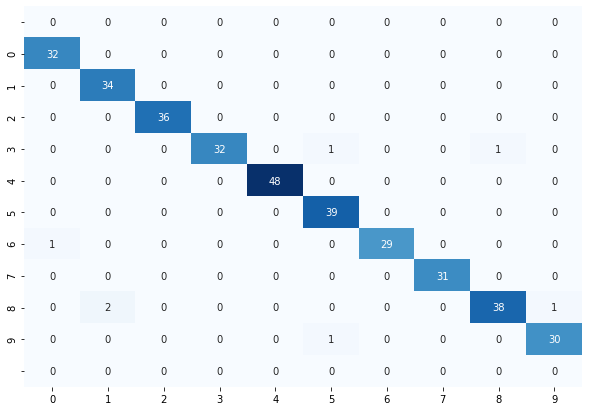

In [10]:
accuracy_score(testing_set_Y, y_pred)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
    
cm =confusion_matrix(testing_set_Y, y_pred)
cm_ok = np.zeros((12,10))
for i in range(10):
    cm_ok[i+1]=cm[i]
df_cm = pd.DataFrame(cm_ok, index = [i for i in " 0123456789 "],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cbar=False, cmap="Blues", fmt='g')